# Zoom in 2021-08 using 1-day equidistant splits 

In [1]:
from src.data_splits.utils.best_split_utils import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the merged malware data
df = pd.read_csv("../vt_reports/merge.csv")
df.head()

,sha256,first_submission_date,family
0,98f8e26e12b978102fa39c197f300ebe5fe535617737d5...,1630575593,tnega
1,7b2999ffadbc3b5b5c5e94145ca4e2f8de66ac1e3ddd52...,1629375559,quasar
2,e7569d494fe00be04ef6c9fcc5e54720c0df623b08e79d...,1362057319,pasta
3,1ed60c04f572b6acb9f64c31db55ef5c6b5465bd4da1eb...,1630624233,cjishu
4,4c4aaff20a57213d9a786e56ad22f1eaa94694a2f1042b...,1592186154,kingsoft


In [3]:
fsd = "first_submission_date"
# Convert the timestamps to datetime format
df_dt = df.copy()
df_dt[fsd] = df_dt[fsd].apply(lambda t: pd.to_datetime(t, unit='s'))

In [4]:
date_min, date_max = pd.Timestamp(f"2021-08-01"), pd.Timestamp(f"2021-09-01")
# Create 1-day equidistant splits
date_splits = pd.date_range(start=date_min, end=date_max, freq="D").tolist()

In [5]:
bs_f = lambda x: ((np.exp(-np.power(x - 0.75, 2)) - np.exp(-np.power(0.75, 2))) / 
                  (1 - np.exp(- np.power(0.75, 2))))

In [6]:
df_scores, df_ref_scores = df_dt.copy(), df_dt.copy()
js_scores, perc_app_families, balance_scores = [], [], []
for date_split in date_splits:
    scores = compute_scores(df=df_scores, ref_df=df_ref_scores, date_split=date_split, bs_f=bs_f)
    js_scores.append(scores["js"])
    perc_app_families.append(scores["af"])
    balance_scores.append(scores["bs"])

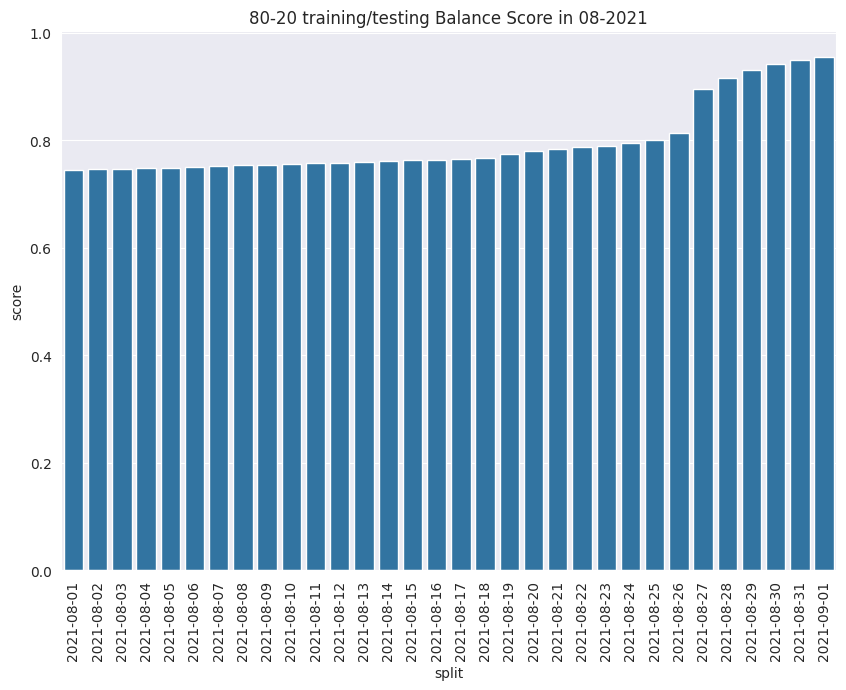

In [7]:
df_bs = pd.DataFrame({"split": date_splits, "score": balance_scores})
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=df_bs, x="split", y="score")
#ax.patches[idx_max_bs].set_facecolor('red')

plt.title("80-20 training/testing Balance Score in 08-2021")
plt.xticks(rotation=90)
plt.show()

In [8]:
for split in df_bs["split"]:
    print_statistics(df_scores, split, f"{split}, BS: {df_bs[df_bs['split'] == split]['score'].iloc[0]}")

------------------------------------------------------------------
Report: 2021-08-01 00:00:00, BS: 0.7451120152841259
	Training set length: 27416, (40.92%)
	Testing set length: 39584, (59.08%)
	Num families in training: 596
	Num families in testing: 650
	Common families: 576
	Families in training but not in testing: 20 (2.99%)
	Families in testing but not in training: 74 (11.04%)
------------------------------------------------------------------
Report: 2021-08-02 00:00:00, BS: 0.7456381407165215
	Training set length: 27441, (40.96%)
	Testing set length: 39559, (59.04%)
	Num families in training: 596
	Num families in testing: 650
	Common families: 576
	Families in training but not in testing: 20 (2.99%)
	Families in testing but not in training: 74 (11.04%)
------------------------------------------------------------------
Report: 2021-08-03 00:00:00, BS: 0.7465840503326209
	Training set length: 27486, (41.02%)
	Testing set length: 39514, (58.98%)
	Num families in training: 597
	Num fa

In [9]:
df_aug = df_dt[df_dt[fsd] < pd.Timestamp("2021-08-27")]
df_aug = df_aug[df_aug[fsd] > pd.Timestamp("2021-08-26")]
date_splits = df_aug[fsd].sort_values().unique().tolist()

In [10]:
df_scores, df_ref_scores = df_dt.copy(), df_dt.copy()
balance_scores = []
for date_split in date_splits:
    scores = compute_scores(df=df_scores, ref_df=df_ref_scores, 
                            date_split=date_split, bs_f=bs_f)
    balance_scores.append(scores["bs"])

In [11]:
for split in df_bs["split"]:
    print_statistics(df_scores, split, f"{split}, BS: "
                                       f"{df_bs[df_bs['split'] == split]['score'].iloc[0]}")

------------------------------------------------------------------
Report: 2021-08-01 00:00:00, BS: 0.7451120152841259
	Training set length: 27416, (40.92%)
	Testing set length: 39584, (59.08%)
	Num families in training: 596
	Num families in testing: 650
	Common families: 576
	Families in training but not in testing: 20 (2.99%)
	Families in testing but not in training: 74 (11.04%)
------------------------------------------------------------------
Report: 2021-08-02 00:00:00, BS: 0.7456381407165215
	Training set length: 27441, (40.96%)
	Testing set length: 39559, (59.04%)
	Num families in training: 596
	Num families in testing: 650
	Common families: 576
	Families in training but not in testing: 20 (2.99%)
	Families in testing but not in training: 74 (11.04%)
------------------------------------------------------------------
Report: 2021-08-03 00:00:00, BS: 0.7465840503326209
	Training set length: 27486, (41.02%)
	Testing set length: 39514, (58.98%)
	Num families in training: 597
	Num fa